In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#%matplotlib inline # to imbed plots in jupyter notebook

In [6]:
# Define file paths
path1 = r"C:\Users\ShannonKnight\OneDrive - PPO Serve\Documents\ironhack\Week 5\project3_CX_Vanguard\data\cleaned\cleaned_data1.csv"
path2 = r"C:\Users\ShannonKnight\OneDrive - PPO Serve\Documents\ironhack\Week 5\project3_CX_Vanguard\data\cleaned\cleaned_data2.csv"
path3 = r"C:\Users\ShannonKnight\OneDrive - PPO Serve\Documents\ironhack\Week 5\project3_CX_Vanguard\data\cleaned\cleaned_data3.csv"

# Read comma-separated text files into DataFrames
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

In [ ]:
Client behavior analysis

Answer the following questions about demographics:

Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?
Next, carry out a client behaviour analysis to answer any additional relevant questions you think are important.

In [7]:
df1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [8]:
df2.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [9]:
df3.head()

,client_id,visitor_id,visit_id,process_step,date_time,year_month
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,201704
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,201704
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,201704
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,201704
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,201704


In [11]:
# filter df2 so only those who are part of the experiment remain

filtered_df2 = df2[(df2['Variation'] == "Test") | (df2['Variation'] == "Control")]

In [12]:
merged_df = pd.merge(df3, filtered_df2, how='inner', on='client_id')

In [13]:
merged_df.shape

(321309, 7)

In [14]:
merged_df_dem = pd.merge(df1, filtered_df2, how='inner', on='client_id')

In [15]:
merged_df_dem

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50482,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50483,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50484,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50485,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [19]:
result=merged_df_dem.groupby(['gendr','Variation'])['client_id'].agg(['count'])
result

count
gendr Variation       
F     Control     7542
      Test        8716
M     Control     7970
      Test        8977
U     Control     8014
      Test        9268

In [ ]:
merged_df_dem["age_bands"]

In [20]:
merged_df_dem["clnt_age"].max()

96.0

In [21]:
merged_df_dem["clnt_age"].min()

17.0

In [44]:
bins = [16.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 110.0]
labels = ['16-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']
merged_df_dem['age_band'] = pd.cut(merged_df_dem[ "clnt_age"], bins = bins, labels = labels, include_lowest=True)

merged_df_dem['age_band'].value_counts()

age_band
56-65    10690
26-35    10529
46-55     9960
36-45     8526
66-75     5704
16-25     3799
76+       1279
Name: count, dtype: int64

In [45]:
result=merged_df_dem.groupby(['gendr','age_band'])['client_id'].agg(['count'])
result

C:\Users\ShannonKnight\AppData\Local\Temp\ipykernel_26560\1885727692.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result=merged_df_dem.groupby(['gendr','age_band'])['client_id'].agg(['count'])


count
gendr age_band       
F     16-25       586
      26-35      2583
      36-45      2809
      46-55      3600
      56-65      3948
      66-75      2249
      76+         483
M     16-25       727
      26-35      3034
      36-45      3048
      46-55      3551
      56-65      3790
      66-75      2235
      76+         562
U     16-25      2486
      26-35      4912
      36-45      2669
      46-55      2809
      56-65      2952
      66-75      1220
      76+         234

In [46]:
# Group by 'gendr' and 'age_band', and aggregate count
result = merged_df_dem.groupby(['gendr', 'age_band'])['client_id'].agg(count='count')

# Calculate total count
total_count = result['count'].sum()

# Calculate percentage and add it as a new column
result['percentage'] = round((result['count'] / total_count) * 100,2)

C:\Users\ShannonKnight\AppData\Local\Temp\ipykernel_26560\4084839153.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = merged_df_dem.groupby(['gendr', 'age_band'])['client_id'].agg(count='count')


In [47]:
result

count  percentage
gendr age_band                   
F     16-25       586        1.16
      26-35      2583        5.12
      36-45      2809        5.56
      46-55      3600        7.13
      56-65      3948        7.82
      66-75      2249        4.45
      76+         483        0.96
M     16-25       727        1.44
      26-35      3034        6.01
      36-45      3048        6.04
      46-55      3551        7.03
      56-65      3790        7.51
      66-75      2235        4.43
      76+         562        1.11
U     16-25      2486        4.92
      26-35      4912        9.73
      36-45      2669        5.29
      46-55      2809        5.56
      56-65      2952        5.85
      66-75      1220        2.42
      76+         234        0.46

In [48]:
pivot_table = pd.pivot_table(merged_df_dem, 
                             values='client_id',  # Specify the column whose values will be aggregated
                             index='age_band',   # Specify the column to use as the index of the pivot table
                             columns='gendr', # Specify the column to use as the columns of the pivot table
                             aggfunc='count',  # Specify the aggregation function (e.g., 'sum', 'mean', 'count', etc.)
                             #fill_value=fill_value,  # Specify the value to replace missing values
                             margins=False,
                             observed=False)        # Set to True to compute row and column totals

pivot_table

gendr,F,M,U
age_band,,,
16-25,586,727,2486
26-35,2583,3034,4912
36-45,2809,3048,2669
46-55,3600,3551,2809
56-65,3948,3790,2952
66-75,2249,2235,1220
76+,483,562,234


In [49]:
pivot_table2 = pd.pivot_table(merged_df_dem, 
                             values='client_id',  # Specify the column whose values will be aggregated
                             index='age_band',   # Specify the column to use as the index of the pivot table
                             columns='gendr', # Specify the column to use as the columns of the pivot table
                             aggfunc='count',  # Specify the aggregation function (e.g., 'sum', 'mean', 'count', etc.)
                             #fill_value=fill_value,  # Specify the value to replace missing values
                             margins=True,
                             observed=False)        # Set to True to compute row and column totals

pivot_table2

gendr,F,M,U,All
age_band,,,,
16-25,586,727,2486,3799
26-35,2583,3034,4912,10529
36-45,2809,3048,2669,8526
46-55,3600,3551,2809,9960
56-65,3948,3790,2952,10690
66-75,2249,2235,1220,5704
76+,483,562,234,1279
All,16258,16947,17282,50487


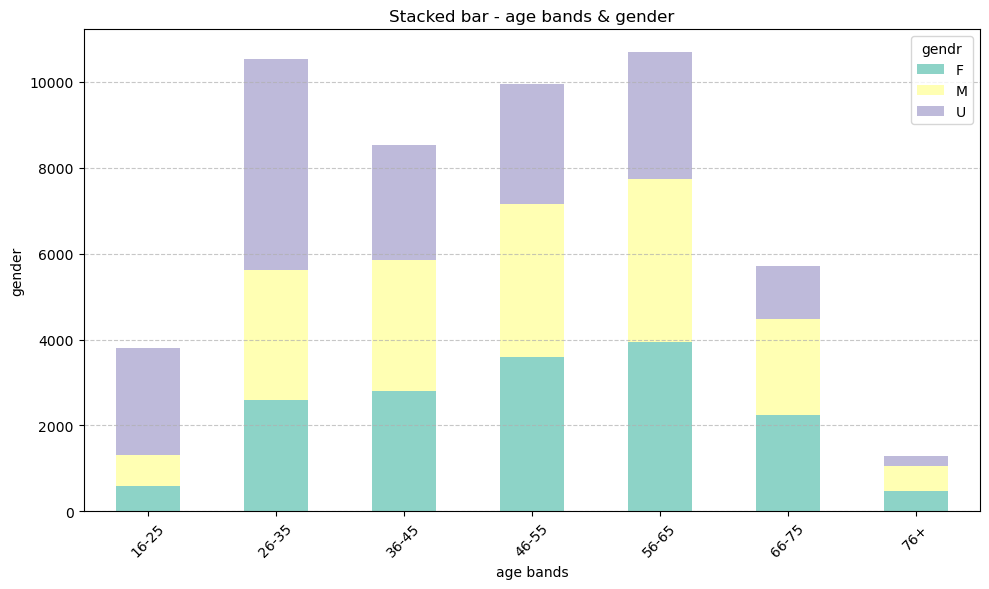

In [60]:
sns.set_palette("Set3")
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked bar - age bands & gender')
plt.xlabel('age bands')
plt.ylabel('gender')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [53]:
merged_df_dem["clnt_tenure_yr"].max()

55.0

In [54]:
merged_df_dem["clnt_tenure_yr"].min()

2.0

In [67]:
bins = [2.0, 5.0, 10.0, 15.0, 20.0, 30.0, 60.0]
labels = ['2-5 yrs', '6-10 yrs', '11-15 yrs', '16-20 yrs', '21-30 yrs', '31+ yrs']
merged_df_dem['clnt_tenure_band'] = pd.cut(merged_df_dem[ "clnt_tenure_yr"], bins = bins, labels = labels, include_lowest=True)

frequency_table = merged_df_dem['clnt_tenure_band'].value_counts()

C:\Users\ShannonKnight\AppData\Local\Temp\ipykernel_26560\2282709079.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3")


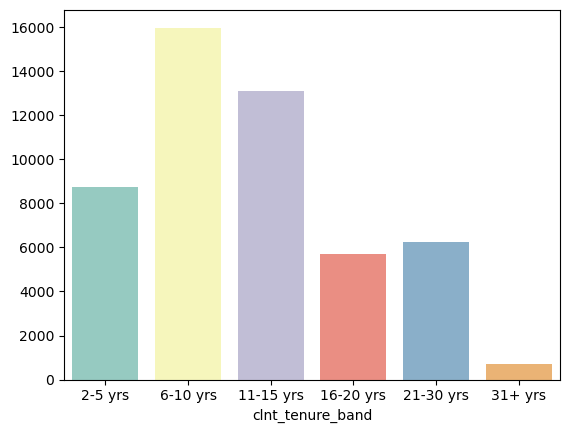

In [68]:
ax=sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3")

In [77]:
pivot_table3 = pd.pivot_table(merged_df, 
                             values='client_id',  # Specify the column whose values will be aggregated
                             index='process_step',   # Specify the column to use as the index of the pivot table
                             columns='year_month', # Specify the column to use as the columns of the pivot table
                             aggfunc='count',  # Specify the aggregation function (e.g., 'sum', 'mean', 'count', etc.)
                             #fill_value=fill_value,  # Specify the value to replace missing values
                             margins=True,
                             observed=False)        # Set to True to compute row and column totals

pivot_table3

year_month,201703,201704,201705,201706,All
process_step,,,,,
confirm,8129,24106,7092,3900,43227
start,16836,58633,19015,9598,104082
step_1,12750,39029,10719,5938,68436
step_2,11026,32742,8496,4611,56875
step_3,9627,28350,7129,3583,48689
All,58368,182860,52451,27630,321309


In [78]:
pivot_table4 = pd.pivot_table(merged_df, 
                             values='year_month',  # Specify the column whose values will be aggregated
                             index='client_id',   # Specify the column to use as the index of the pivot table
                             columns='process_step', # Specify the column to use as the columns of the pivot table
                             aggfunc='count',  # Specify the aggregation function (e.g., 'sum', 'mean', 'count', etc.)
                             #fill_value=fill_value,  # Specify the value to replace missing values
                             margins=True,
                             observed=False)        # Set to True to compute row and column totals

pivot_table4

process_step,confirm,start,step_1,step_2,step_3,All
client_id,,,,,,
555,1.0,1.0,1.0,1.0,1.0,5
647,1.0,1.0,1.0,1.0,1.0,5
934,NaN,4.0,NaN,NaN,NaN,4
1028,NaN,1.0,5.0,2.0,1.0,9
1104,NaN,2.0,NaN,NaN,NaN,2
...,...,...,...,...,...,...
9999400,1.0,1.0,1.0,1.0,1.0,5
9999626,NaN,1.0,1.0,NaN,NaN,2
9999729,1.0,4.0,3.0,2.0,1.0,11


In [81]:
merged_df['process_step'].value_counts()

process_step
start      104082
step_1      68436
step_2      56875
step_3      48689
confirm     43227
Name: count, dtype: int64

In [92]:
distinct_visits_per_client = merged_df.groupby('client_id')['visit_id'].nunique()
frequency_table = pd.DataFrame(distinct_visits_per_client)
frequency_table

,visit_id
client_id,
555,1
647,1
934,1
1028,1
1104,2
...,...
9999150,1
9999400,1
9999626,1


In [94]:
frequency_table['visit_id'].min()

1

In [95]:
frequency_table['visit_id'].max()

18

In [100]:
visit_counts = frequency_table['visit_id'].value_counts()
print(visit_counts)

visit_id
1     37504
2      9450
3      2311
4       714
5       263
6       105
7        59
8        38
9        24
10       12
12        8
11        4
13        4
14        1
17        1
15        1
18        1
Name: count, dtype: int64


C:\Users\ShannonKnight\AppData\Local\Temp\ipykernel_26560\1714972018.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=visit_counts.index, y=visit_counts.values, palette="Set3")


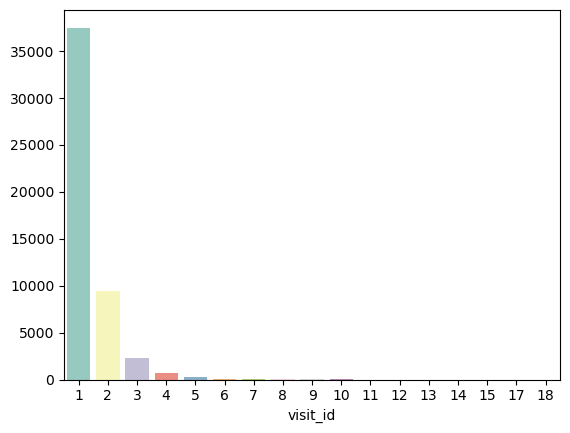

In [102]:
ax=sns.barplot(x=visit_counts.index, y=visit_counts.values, palette="Set3")